In [3]:
import eia

api_key = "YOURAPIKEYHERE"
api = eia.API(api_key)

### Search By Keyword ###
# set return_list to True if you only want a list of data series names.
# filters_to_keep and filters_to_remove filter the search results, and 
# keep or delete, respectively, search results which contain filtered words.
keyword_search = api.search_by_keyword(keyword=['nuclear', 'price'],
                                       filters_to_keep=['AEO2015'],
                                       filters_to_remove=['high price'],
                                       rows=1000, 
                                       return_list=False)

for key, value in keyword_search.items():
    print(key, value)


### Search By Category ID ###
# set return_list to True if you only want a list of data series names
category_search = api.search_by_category(category=2,
                                         filters_to_keep=['Alabama'],
                                         filters_to_remove=['quarterly'],
                                         return_list=False)

for key, value in category_search.items():
    print(key, value)


### Search By Date Last Updated ###
# set return_list to True if you only want a list of data series names
date_search = api.search_by_date(date='2014-01-01T00:00:00Z TO \
                                       2015-01-01T23:59:59Z',
                                 filters_to_keep=['Illinois'],
                                 filters_to_remove=['annual'],
                                 rows=1000, 
                                 return_list=True)

for result in date_search:
    print(result)


Electricity Generation : Southwest Power Pool / North : Nuclear, Low price, AEO2015 {'Frequency': 'A', 'Units': 'billion kWh', 'Series ID': 'AEO.2015.LOWPRICE.GEN_NA_ELEP_NA_NUC_NA_SWPPNO_BLNKWH.A'}
Electricity Capacity : Southwest Power Pool / South : Nuclear, Low price, AEO2015 {'Frequency': 'A', 'Units': 'GW', 'Series ID': 'AEO.2015.LOWPRICE.CAP_NA_ELEP_NA_NUC_NA_SWPPSO_GW.A'}
Energy Use : Electric Power : Nuclear, East South Central, Low price, AEO2015 {'Frequency': 'A', 'Units': 'quads', 'Series ID': 'AEO.2015.LOWPRICE.CNSM_ENU_ELEP_NA_NUC_NA_ESC_QBTU.A'}
Electricity Capacity : Reliability First Corporation / West : Nuclear, Low price, AEO2015 {'Frequency': 'A', 'Units': 'GW', 'Series ID': 'AEO.2015.LOWPRICE.CAP_NA_ELEP_NA_NUC_NA_RFCWT_GW.A'}
Electricity Generation : SERC Reliability Corporation / Central : Nuclear, Low price, AEO2015 {'Frequency': 'A', 'Units': 'billion kWh', 'Series ID': 'AEO.2015.LOWPRICE.GEN_NA_ELEP_NA_NUC_NA_SERCCNT_BLNKWH.A'}
Energy Use : Electric Power : Nu

In [4]:
tot_elec = api.data_by_series("TOTAL.NUETPUS.A")
tot_cap = api.data_by_series("TOTAL.NUCASUS.A")
sum_cap = api.data_by_series("TOTAL.NUGBPUS.A")
op_units = api.data_by_series("TOTAL.NUOUPUS.A")
nuc_share =  api.data_by_series("TOTAL.NUETSUS.M")


tot_elec_series = ["TOTAL.CLEIBUS.M",
"TOTAL.HVEGBUS.M",
"TOTAL.ELNIBUS.M",
"TOTAL.GEEGBUS.M",
"TOTAL.NNEIBUS.M",
"TOTAL.NUEGBUS.M",
"TOTAL.SOEGBUS.M",
"TOTAL.BMEIBUS.M",
"TOTAL.WYEGBUS.M"]

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpld3


import numpy as np
import datetime
import math
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('Time')
plt.ylabel('US Electricity Consumption (Trillion Btu)')
plt.title('Electricity Consumption by Generation Type (Trillion Btu)')

colors = cm.rainbow(np.linspace(0, 1, 10))
i=0
labels = []
for series in tot_elec_series:
    i+=1
    dates = []
    dat = api.data_by_series(series)
    for title in dat.keys():
        lab = title.split(" ")[0]
        labels.append(list(lab)*len(vals.keys()))
        vals = dat[title]
        times = list(vals.keys())
        btus_str = [0 if v=='NA' else v for v in list(vals.values())]
        btus = list(map(float, btus_str))
    for t in times:
        y, m = t.rstrip(" ").split(" ")
        dates.append(datetime.date(year=int(y), month=int(m), day=1))
    scatter = ax1.scatter(dates, btus, label=lab, c=colors[i])
            labels.append(lab)

    
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()

IndentationError: unexpected indent (<ipython-input-9-4898738caf26>, line 33)

In [ ]:
# Import the IPython display module
from IPython.display import IFrame
IFrame('http:////www.eia.gov/opendata/embed/iframe.php?series_id=TOTAL.NUETPUS.A', width="100%", height=500)


<IPython.core.display.Javascript object>


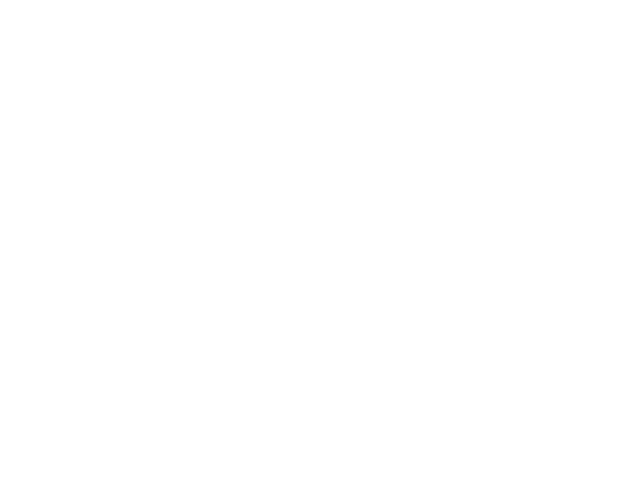

/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/comm/comm.py:52: DeprecationWarning: Comm._comm_id_default is deprecated: use @default decorator instead.
  def _comm_id_default(self):
/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/comm/comm.py:29: DeprecationWarning: Comm._iopub_socket_default is deprecated: use @default decorator instead.
  def _iopub_socket_default(self):
/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/comm/comm.py:24: DeprecationWarning: Comm._kernel_default is deprecated: use @default decorator instead.
  def _kernel_default(self):
/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/comm/comm.py:32: DeprecationWarning: Comm._session_default is deprecated: use @default decorator instead.
  def _session_default(self):
/Users/khuff/anaconda/lib/python3.5/site-packages/ipykernel/comm/comm.py:41: DeprecationWarning: Comm._topic_default is deprecated: use @default decorator instead.
  def _topic_default(self):
/Users/khuff/ana

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
N = 100

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [8]:
[1,2,3]*10

[1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 1,
 2,
 3]